# Sessione di hands-on sulla Computazione Quantistica

_Introduzione alla computazione quantistica, IANUA, Università di Genova, 2025_

<a href="https://colab.research.google.com/github/stfnmangini/handsonqc_genova2025/blob/main/HandsOnQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Questo è un "notebook", ovvero un modo per programmare in maniera interattiva. Lo scopo di questo notebook è di mettere in pratica alcuni dei concetti visti durante la lezione, imparando così a programmare un computer quantistico! 

## Indice:
1. #### Setup dell'ambiente di sviluppo (python, notebooks, colab, qiskit, ...)  
2. #### Costruiamo circuiti quantistici  
3. #### La funzione d'onda di un circuito quantistico
4. #### Rappresentazione di Bloch di un qubit 
5. #### Stati e circuiti di più qubit
6. #### Eseguire un circuto quantistico (simulatore)
7. #### Eseguire un circuito quantistico (hardware reale, IBM)
8. #### Confronto risultati simulatore e hardware
9. #### [Bonus] Rumore e valori di aspettazione
10. #### [Bonus] Variational Quantum Eigensolver (VQE) su un qubit

---

**...let's get started!**

# 1. Installing required packages 

Let's start by installing the necessary packages in the current environment

In [ ]:
# %pip install qiskit qiskit-aer qiskit-ibm-runtime 
# %pip install matplotlib pylatexenc
# %pip install pennylane

In [1]:
# Import generic libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import quantum-info library
import qiskit as qk

# 2. Create and familiarize with qiskit's quantum circuits

#### Recap of useful quantum-info facts

A qubit is a two-level quantum mechanical system whose state can be described by the so-called _statevector_:
$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle \quad \text{with}\quad |\alpha|^2 + |\beta|^2 = 1$$

List of common single and two-qubit gates:

<img src="imgs/single_qubit_gates.png" width = "750px"/>
<div>
<img src="imgs/two_qubit_gates.png" width= "750px"/>

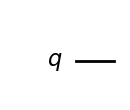

In [2]:
# Create a quantum circuit with 1 qubit
num_qubits = 1
qc = qk.QuantumCircuit(num_qubits)

# Draw a graphical representation of the circuit (using matplotlib)
qc.draw(output='mpl')

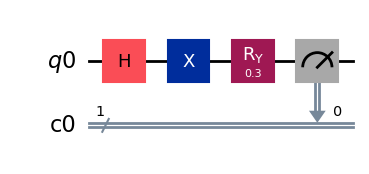

In [3]:
# Start same as before, but with adding more gates
num_qubits = 1

qr = qk.QuantumRegister(num_qubits)
cr = qk.ClassicalRegister(1)

qc = qk.QuantumCircuit(qr, cr)

# Add a Hadamard gate
qc.h(0)

qc.x(0)

qc.ry(0.3, 0)
# add other gates...

# add a measurement gate...
qc.measure(0, 0)

# Draw a graphical representation of the circuit (using matplotlib)
qc.draw(output='mpl')

#### More qubits, more fun

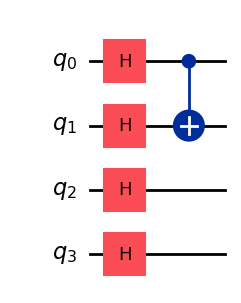

In [4]:
# Start same as before, but with more qubits
num_qubits = 4
qc = qk.QuantumCircuit(num_qubits)

# Add a layer of single qubit gates
for n in range(num_qubits):
    qc.h(n)

# Add a layer of entangling gates
control_qubit_index = 0
target_qubit_index = 1
qc.cx(control_qubit_index, target_qubit_index)

# Draw a graphical representation of the circuit (using matplotlib)
qc.draw(output='mpl')

# 3. Let's get the statevectors

Useful reminder: the state of a single-qubit system is described by a pair of complex numbers

$$|\psi\rangle = c_0 |0\rangle + c_1 |1\rangle \longrightarrow [c_0,\, c_1]$$

In [5]:
from qiskit.quantum_info import Statevector

|psi> =  [0.        -0.84147098j 0.54030231+0.j        ]


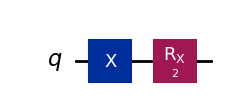

In [6]:
qc = qk.QuantumCircuit(1)

qc.x(0)
qc.rx(2, 0)

# Let qiskit compute the statevector of corresponding to the quantum circuit
psi = Statevector(qc)
print("|psi> = ", psi.data)

qc.draw(output='mpl')

# 4. Boch sphere representation of a qubit

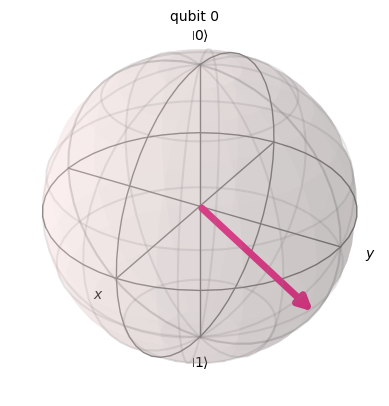

In [7]:
from qiskit.visualization import plot_bloch_multivector

# Create a quantum circuit with 1 qubit and apply a gate
qc = qk.QuantumCircuit(1)
qc.x(0)
qc.rx(1, 0)

# Plot its representation in the bloch sphere
plot_bloch_multivector(qc)

In [8]:
def bloch_vector(state):
    """
    Calculate components in Bloch Sphere given a quantm state (a ket |psi>) 
    """
    I = np.array([[1, 0], [0, 1]])
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])

    rho = np.outer(state, np.conjugate(state))
    rx = np.trace(np.dot(rho, X)).real
    ry = np.trace(np.dot(rho, Y)).real
    rz = np.trace(np.dot(rho, Z)).real
    return rx, ry, rz

def plot_state(states, ax = None):
    """
    Plot single qubit quantum states on the bloch sphere.
    """
    from qiskit.visualization import plot_bloch_vector

    states = np.array(states)
    
    if ax == None:
        fig = plt.figure(figsize=(9.6, 6))
        ax = plt.subplot(projection='3d')

    plot_bloch_vector([0, 0, 0], ax=ax)

    if states.ndim == 1:
        states = np.expand_dims(states, 0)

    cmap = plt.cm.viridis.resampled(len(states))

    for i, state in enumerate(states):
        x, y, z = bloch_vector(state)
        ax.plot(y, -x, z, marker='o', color=cmap(i), markersize=10, alpha=1.)
    return ax

<Axes3D: >

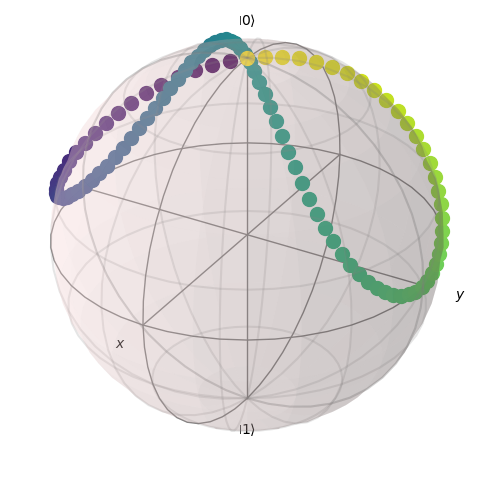

In [9]:
# Visualizing rotations along the Pauli axis
theta = np.linspace(0, 2 * np.pi, 100)

state_list = []
for t in theta:
    qc = qk.QuantumCircuit(1)
    qc.rx(t, 0)
    qc.ry(t, 0)
    state_list.append(Statevector(qc).data)    

plot_state(state_list)

# 5. Statevectors of multi-qubit systems

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


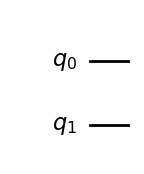

In [10]:
qc = qk.QuantumCircuit(2)
psi = Statevector(qc)
print(psi)
qc.draw(output='mpl')

In [11]:
qc = qk.QuantumCircuit(2)
psi0 = Statevector(qc)
print("Initial state: |0> ⊗ |0>  = ", psi0.data)

qc.x(0)
psi = Statevector(qc)
print("Final state:  X|0> ⊗ I|0> = ", psi.data)

psi = Statevector(qc).reverse_qargs()
print("Adjusted Final state:  X|0> ⊗ I|0> = ", psi.data)

Initial state: |0> ⊗ |0>  =  [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Final state:  X|0> ⊗ I|0> =  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Adjusted Final state:  X|0> ⊗ I|0> =  [0.+0.j 0.+0.j 1.+0.j 0.+0.j]


_Mind qiskit's ordering!_

When we have two qubits, a generic state is defined as
$$ 
\begin{align} 
|\psi\rangle & = c_0 |0\rangle_{q_0}|0\rangle_{q_1} + c_1 |0\rangle_{q_0}|1\rangle_{q_1} + c_2 |1\rangle_{q_0}|0\rangle_{q_1} + c_3 |1\rangle_{q_0}|1\rangle_{q_1} \\
& = c_0 |00\rangle + c_1 |01\rangle + c_2 |10\rangle + c_3 |11\rangle \\
& = c_0 \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} + c_0 \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} + c_0 \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} + c_0 \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = [c_0,\, c_1,\, c_2,\, c_3]
\end{align}
$$

Starting from the initial ground state, the circuit implements
$$|\psi\rangle = |0\rangle_{q_0}|0\rangle_{q_1} = |0\rangle_{q_0} \otimes |0\rangle_{q_1} \xrightarrow[X \otimes \mathbb{I}]{\text{Evolve with gates}} |\psi'\rangle = X|0\rangle_{q_0}\otimes \mathbb{I}|0\rangle_{q_1} = |1\rangle_{q_0}|0\rangle_{q_1}$$

so, in coefficients we would have $$|\psi\rangle = [1,\,0,\,0,\,0] \longrightarrow |\psi'\rangle = [0,\, 0,\, 1,\, 0]$$

But qiskit orders qubit indices differently, in reversed (_"little-endian"_) order, that is 
$$ |\psi\rangle_{\text{qiskit}} = c_0 |0\rangle_{q_1}|0\rangle_{q_0} + c_1 |0\rangle_{q_1}|1\rangle_{q_0} + c_2 |1\rangle_{q_1}|0\rangle_{q_0} + c_3 |1\rangle_{q_1}|1\rangle_{q_0} $$

so the circuit acts as
$$|0_{q_1}0_{q_0}\rangle \longrightarrow \mathbb{I} |0\rangle_{q_1} \otimes \mathbb{X}|0\rangle_{q_0} = |0_{q_1}1_{q_0}\rangle$$

hence the final state is given by
$$|\psi\rangle_{\text{qiskit}} = [1,\,0,\,0,\,0] \longrightarrow |\psi'\rangle_{\text{qiskit}} = [0,\, 1,\, 0,\, 0]$$


# 6. Finally running a quantum circuit

Measurement outcomes
 {'00': 1000}


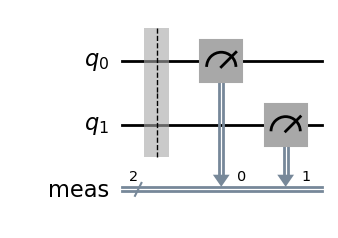

In [12]:
# Impprt the AerSimulator backend from qiskit
from qiskit_aer import AerSimulator
sim_bknd = AerSimulator()

# Define a quantum circuit with 2 qubits and a measurement gate
qc = qk.QuantumCircuit(2)
qc.measure_all()

# Run the circuit on the AerSimulator backend anf get the results
num_shots = 1
res = sim_bknd.run(qc, shots = 1_000).result()

# Print the results
print("Measurement outcomes\n", res.get_counts())

qc.draw(output='mpl')

In [13]:
? sim_bknd.run

Signature:  sim_bknd.run(circuits, parameter_binds=None, **run_options)
Docstring:
Run circuits on the backend.

Args:
    circuits (QuantumCircuit or list): The QuantumCircuit (or list
        of QuantumCircuit objects) to run
    parameter_binds (list): A list of parameter binding dictionaries.
                            See additional information (default: None).
    run_options (kwargs): additional run time backend options.

Returns:
    AerJob: The simulation job.

Raises:
    TypeError: If ``parameter_binds`` is specified with an input or
        has a length mismatch with the number of circuits.

Additional Information:
    * Each parameter binding dictionary is of the form::

        {
            param_a: [val_1, val_2],
            param_b: [val_3, val_1],
        }

      for all parameters in that circuit. The length of the value
      list must be the same for all parameters, and the number of
      parameter dictionaries in the list must match the length of
      ``circu

# 7. Running on an actual quantum deivce (sort-of)

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# You have to be logged in to IBM Quantum to run on real hardware.
# You can do this by registering on IBMQ and running the following commands

#service = QiskitRuntimeService(
#    channel='ibm_quantum',
#    instance='ibm-q/open/main',
#    token='MY_IBM_QUANTUM_TOKEN')

service = QiskitRuntimeService(name='base') 

bknd_list = service.backends()
bknd_list

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [15]:
# Pick the least busy "real" backend
bknd = service.least_busy(simulator=False, operational=True)
bknd.name

'ibm_brisbane'

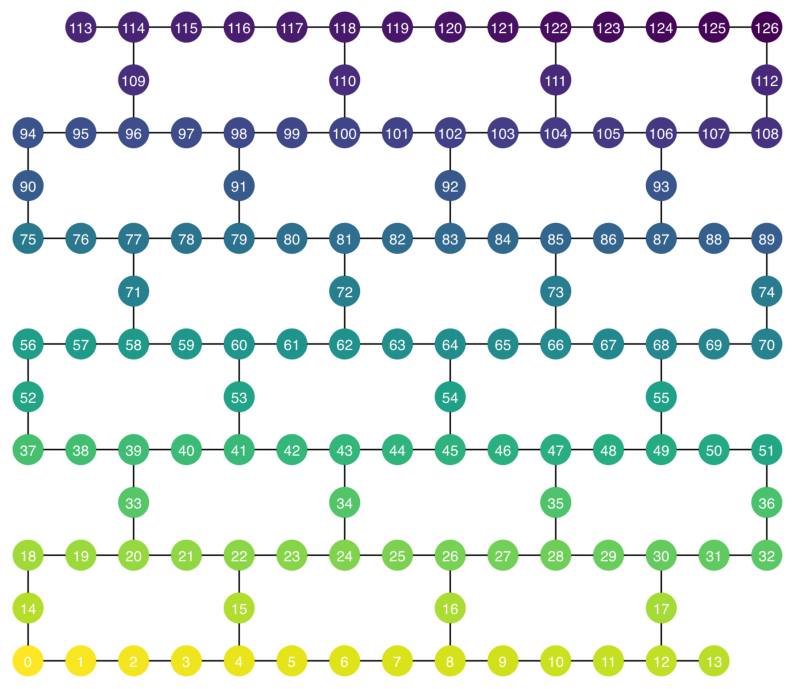

In [36]:
from qiskit.visualization import plot_gate_map, plot_error_map, plot_circuit_layout

plot_gate_map(service.backend('ibm_kyiv'),
              figsize=(10, 10), 
              font_size=20, 
              line_width=2, 
              qubit_size=50,
              line_color = ['black'] * len(bknd.coupling_map.get_edges()),
              qubit_color = [mpl.colors.to_hex(c) for c in plt.cm.viridis_r(np.linspace(0, 1, bknd.num_qubits))])

In [16]:
# Define a quantum circuit with 5 qubits and a measurement gate
qc = qk.QuantumCircuit(5)
qc.measure_all()
print(qc)

         ░ ┌─┐            
   q_0: ─░─┤M├────────────
         ░ └╥┘┌─┐         
   q_1: ─░──╫─┤M├─────────
         ░  ║ └╥┘┌─┐      
   q_2: ─░──╫──╫─┤M├──────
         ░  ║  ║ └╥┘┌─┐   
   q_3: ─░──╫──╫──╫─┤M├───
         ░  ║  ║  ║ └╥┘┌─┐
   q_4: ─░──╫──╫──╫──╫─┤M├
         ░  ║  ║  ║  ║ └╥┘
meas: 5/════╩══╩══╩══╩══╩═
            0  1  2  3  4 


In [ ]:
# Modify the circuit so that it can run on the specified machine
pm = generate_preset_pass_manager(backend=bknd, optimization_level=1)
isa_circuit = pm.run(qc)

# Run it on the device and store the samples (shots)
sampler = Sampler(bknd)
job = sampler.run([isa_circuit], shots=1_000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: czgj5cdzj67g008scpzg
>>> Job Status: QUEUED


In [43]:
print(f">>> Job Status: {job.status()}")

>>> Job Status: DONE


In [71]:
# Get the results with (0 because we only have one circuit)
counts = job.result()[0].data['meas'].get_counts()
counts

{'00000': 887,
 '10000': 82,
 '00010': 11,
 '00100': 8,
 '00001': 6,
 '01000': 3,
 '10010': 3}

<IBMBackend('ibm_kyiv')>
bss: {'seconds': 1}
usage: {'quantum_seconds': 1, 'seconds': 1}
timestamps: {'created': '2025-03-24T09:15:29.124Z', 'finished': '2025-03-24T09:18:04.165Z', 'running': '2025-03-24T09:17:16.375Z'}
executions: 0
num_circuits: 0
num_qubits: None
circuit_depths: None
qiskit_version: qiskit_ibm_runtime-0.37.0,qiskit-1.4.2*,qiskit_aer-0.17.0*
estimated_start_time: 2025-03-24T09:15:30.573Z
estimated_completion_time: 2025-03-24T09:15:31.573Z
position_in_queue: None
position_in_provider: None


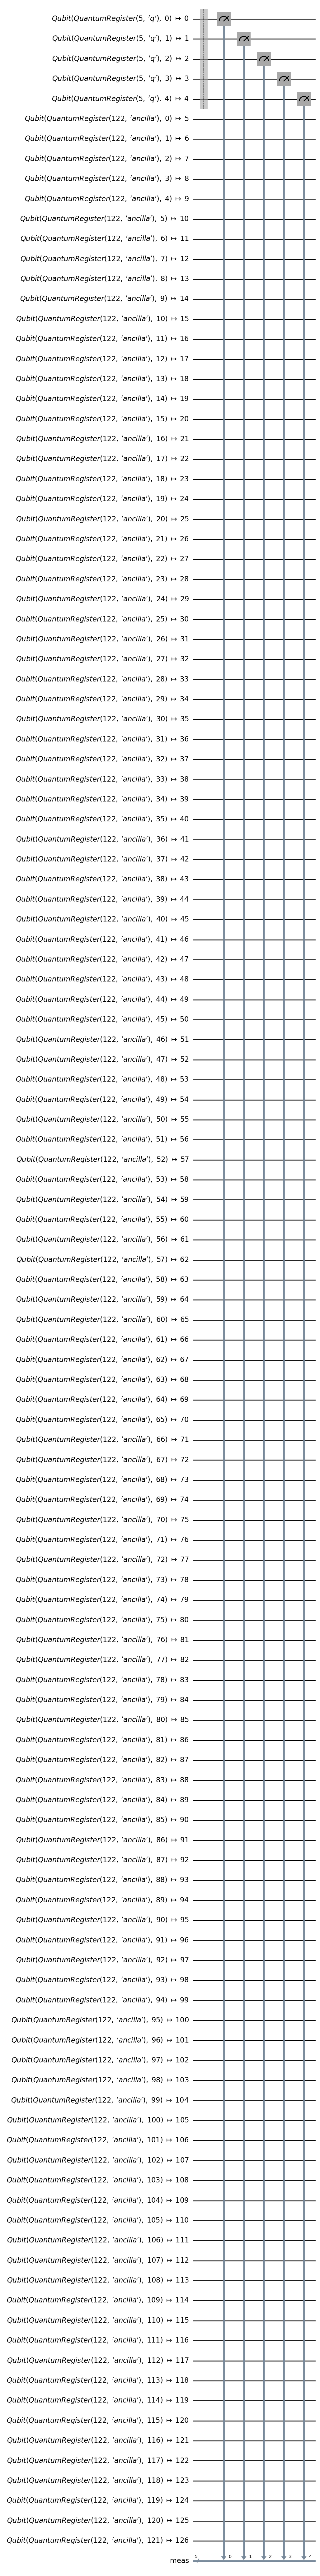

In [19]:
# Retrieve the results from a previous job
real_results = service.job('czgj5cdzj67g008scpzg')

# Print the backend used
print(real_results.backend())

# Print the data of the job
for k, v in real_results.metrics().items():
    print(f"{k}: {v}")

# Print the quantum circuit used
real_results.inputs['pubs'][0][0].draw(output='mpl')

In [20]:
real_counts = real_results.result()[0].data['meas'].get_counts()  
real_counts

{'00000': 887,
 '10000': 82,
 '00010': 11,
 '00100': 8,
 '00001': 6,
 '01000': 3,
 '10010': 3}

In [21]:
sim_bknd = AerSimulator()
sim_counts = sim_bknd.run(qc, shots=1000).result().get_counts()
sim_counts

{'00000': 1000}

In [22]:
# Define a fake simulator backend with the same properties as the real backend
fake_qc = AerSimulator().from_backend(real_results.backend())
fake_counts = fake_qc.run(qc, shots=1000).result().get_counts()

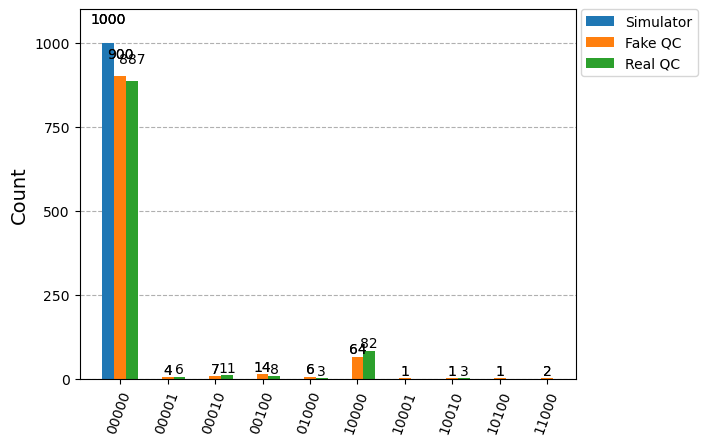

In [23]:
from qiskit.visualization import plot_histogram
plot_histogram([sim_counts, fake_counts, real_counts], 
               legend=['Simulator', 'Fake QC', 'Real QC'])

#### Same, but different: using entangled states

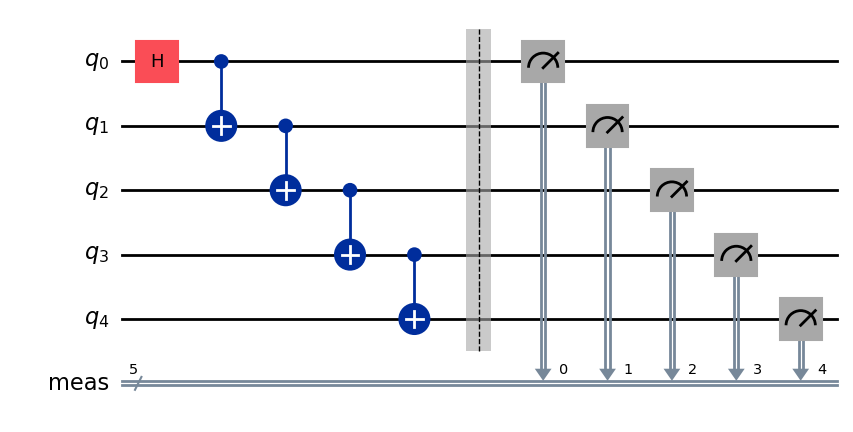

In [87]:
qc_ghz = qk.QuantumCircuit(5)

qc_ghz.h(0)
for i in range(0, 4):
    qc_ghz.cx(i, i+1)

qc_ghz.measure_all()
qc_ghz.draw(output='mpl')

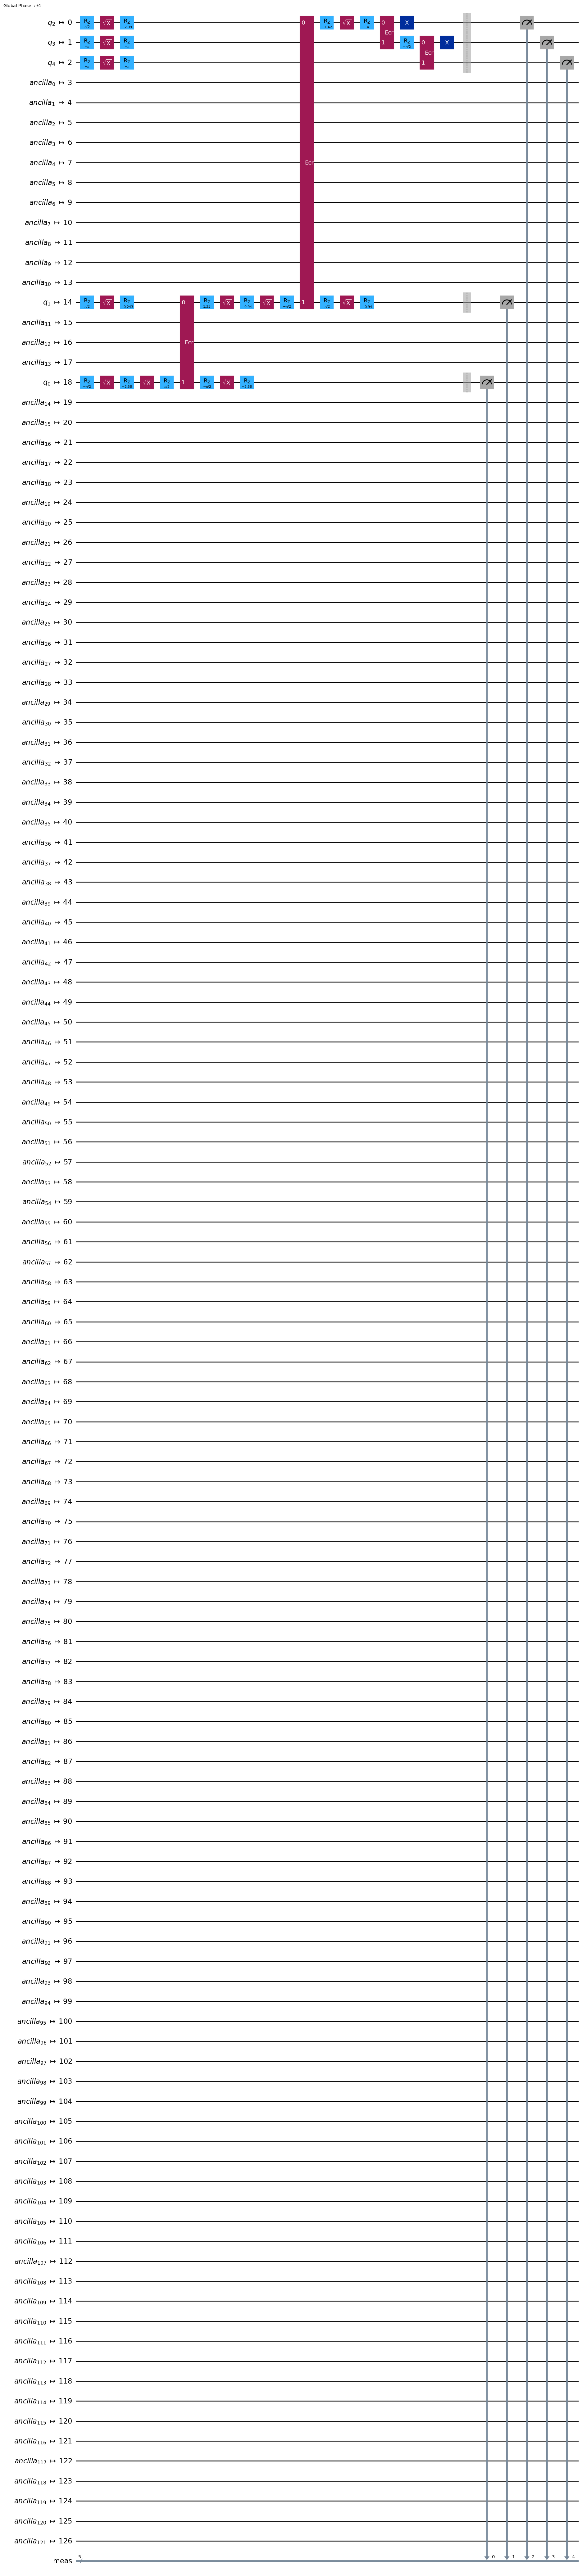

In [88]:
qc_ghz_transpiled = qk.transpile(qc_ghz, backend=bknd)
qc_ghz_transpiled.draw(output='mpl')

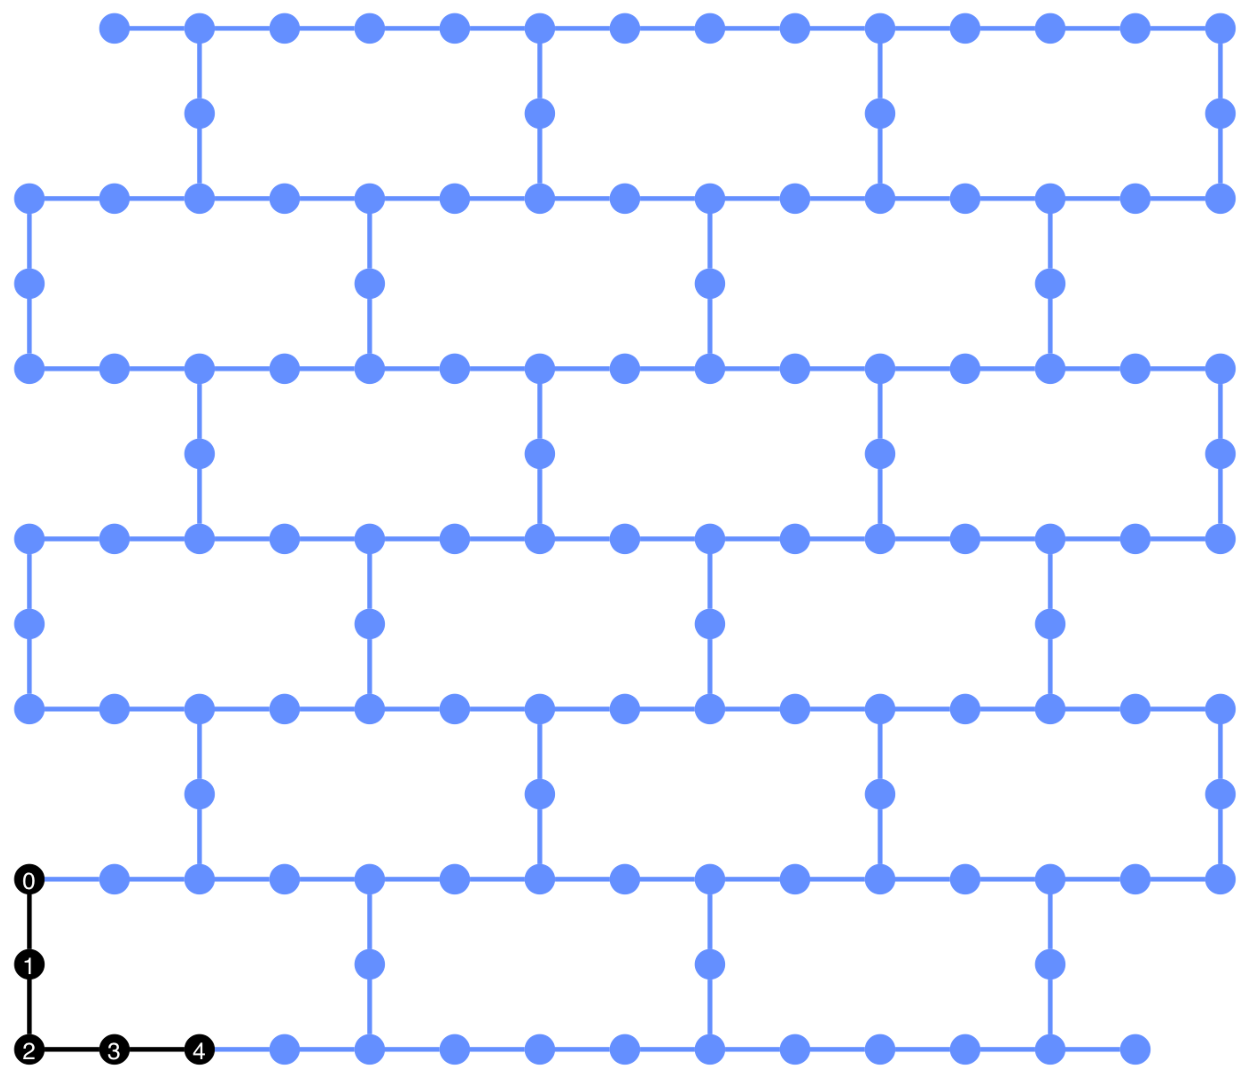

In [89]:
plot_circuit_layout(qc_ghz_transpiled, bknd)

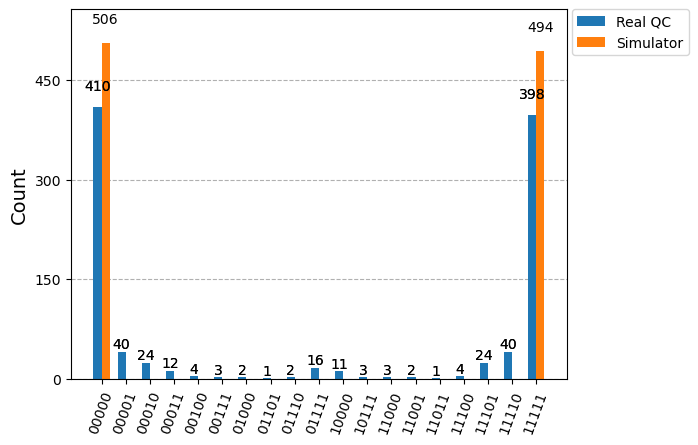

In [93]:
#job = sampler.run([qc_ghz_transpiled], shots=1_000)
#print(f">>> Job ID: {job.job_id()}")     >>> Job ID: czgjb2m7m0r0008vyrvg
#print(f">>> Job Status: {job.status()}") >>> Job Status: QUEUED

# Retrieve previously run job with GHZ
ghz_run = service.job('czgjb2m7m0r0008vyrvg')
real_ghz_counts = ghz_run.result()[0].data['meas'].get_counts()

# Simulate ideal experiment with GHZ
sim_ghz_counts = sim_bknd.run(qc_ghz, shots=1000).result().get_counts()
plot_histogram([real_ghz_counts, sim_ghz_counts],
               legend=['Real QC', 'Simulator'])

# 9. Let's go noisy, with a detour on expectation values

<Axes3D: >

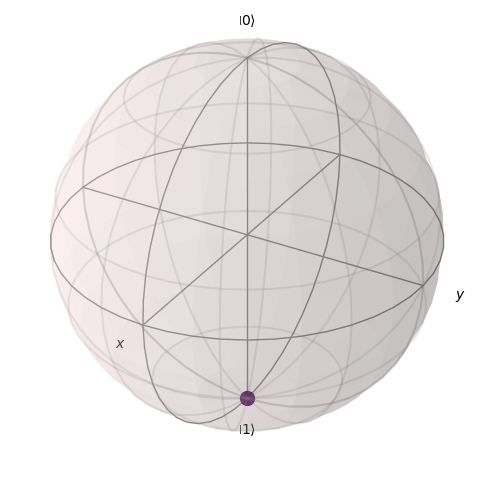

In [24]:
qc = qk.QuantumCircuit(1)
qc.x(0)

# ...what if there is an additional error rotation

plot_state(Statevector(qc).data)

#### One does ~~not~~ simply compute expectation values

$$Z = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = |0\rangle\!\langle 0| - |1\rangle\!\langle1|$$

$$\langle Z \rangle = \text{Tr}[Z\,\rho] = 1 \times \text{Tr}[\rho\, |0\rangle\!\langle 0|] - 1 \times \text{Tr}[\rho\, |1\rangle\!\langle1|] = 1 \times p_0 -1 \times p_1

Measurement outcomes: {'1': 14, '0': 986}
<Z> = 1 * Freq(0) - 1 * Freq(1) = 0.972


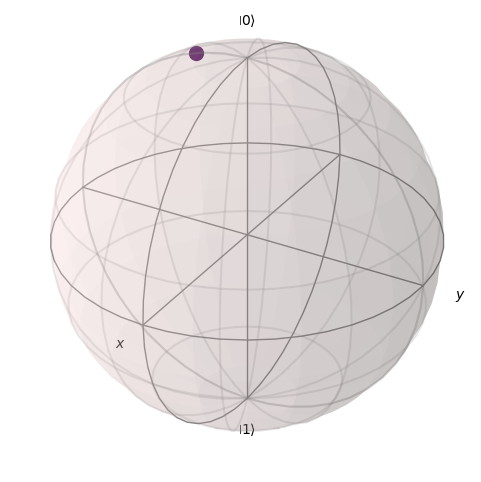

In [25]:
def expval_from_counts(outcomes_dict):
    exp_val = 0
    for outcome, counts in outcomes_dict.items():
        val = 1 if outcome == '0' else -1
        exp_val += val * counts
    num_shots = sum(outcomes_dict.values())
    return exp_val / num_shots

qc = qk.QuantumCircuit(1)
qc.rx(0.3, 0)
qc.measure_all()

res = sim_bknd.run(qc, shots=1000).result()
counts = res.get_counts()

print("Measurement outcomes:", counts)
print("<Z> = 1 * Freq(0) - 1 * Freq(1) =", expval_from_counts(counts))

qc.remove_final_measurements()
plot_state(Statevector(qc).data);

In [26]:
# Same way, but using qiskit functions
from qiskit.quantum_info import Pauli

qc = qk.QuantumCircuit(1)
qc.rx(0.3, 0)
pauliZ = Pauli('Z')
qk_expval = Statevector(qc).expectation_value(pauliZ)
print("Qiskit expectation value: ", qk_expval)

Qiskit expectation value:  0.9553364891256059


#### Computing X and Y expectation values by change of basis

$$ X = H~Z~H $$
$$ Y = (S H)~Z~(H S^\dagger) $$

Measurement outcomes: {'1': 69, '0': 931}
<Z> = 1 * Freq(0) - 1 * Freq(1) = 0.862


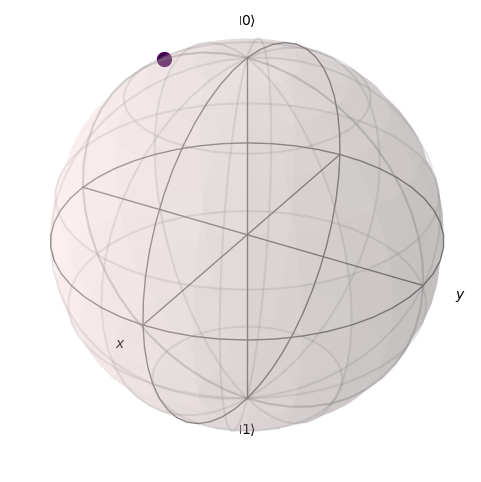

In [27]:
qc = qk.QuantumCircuit(1)
qc.rx(0.5, 0)

# Define a circuit including a change of basis circuit
qc_meas = qc.copy()
measure = 'Z'
match measure:
    case 'Z':
        pass
    case 'X':
        qc_meas.h(0)
    case 'Y':
        qc_meas.sdg(0)
        qc_meas.h(0)

# Measure in the X basis
qc_meas.measure_all()

counts = sim_bknd.run(qc_meas, shots=1000).result().get_counts()
print("Measurement outcomes:", counts)
print("<Z> = 1 * Freq(0) - 1 * Freq(1) =", expval_from_counts(counts))

plot_state(Statevector(qc).data);

#### Back to noise!

Let's assume that every $X$ gate is faulty, that is we experimentally implement

$$X \longrightarrow X_{\text{noisy}} =  R_{X}(\varepsilon) X $$

In [28]:
from qiskit_aer.noise import NoiseModel, coherent_unitary_error

def pauliX_rotation(theta):
    """Function that returns the unitary for a Pauli-X rotation gate"""
    op = np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], 
                   [-1j*np.sin(theta/2), np.cos(theta/2)]]) 
    return op

eps = 0.05
error = coherent_unitary_error(pauliX_rotation(eps))

In [29]:
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'u2', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3']


Measurement outcomes: {'0': 9, '1': 9991}
Expectation value: -0.9982


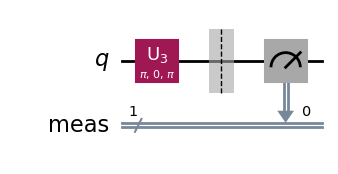

In [30]:
noisy_bknd = AerSimulator(noise_model=noise_model)

qc = qk.QuantumCircuit(1)
qc.x(0)
qc.measure_all()

qc_transpiled = qk.transpile(qc, backend=noisy_bknd)

counts = noisy_bknd.run(qc_transpiled, shots = 10000).result().get_counts()
print("Measurement outcomes:", counts)
expval = expval_from_counts(counts)
print("Expectation value:", expval)

qc_transpiled.draw(output='mpl')

**What if we have more gates?**

In [ ]:
qc_list = []
expval_list = []
for d in range(100):
    qc = qk.QuantumCircuit(1)
    for _ in range(d):
        qc.x(0)
        qc.x(0)
    qc.measure_all()

    qc_transpiled = qk.transpile(qc, backend=noisy_bknd, optimization_level=0)
    counts = noisy_bknd.run(qc_transpiled, shots = 1000).result().get_counts()
    expval = expval_from_counts(counts)

    qc_list.append(qc_transpiled)
    expval_list.append(expval)

qc_list[0].draw(output='mpl')

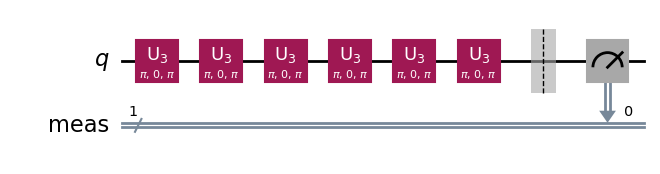

In [42]:
qc_list[3].draw(output='mpl')

Text(0, 0.5, 'Expectation value $\\langle{Z}\\rangle$')

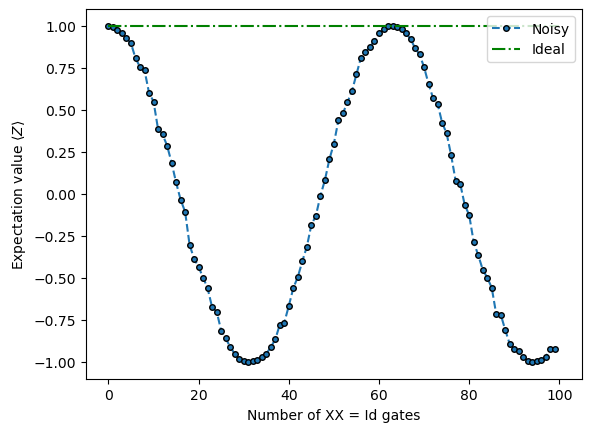

In [45]:
plt.plot(expval_list, marker='o', ms = 4, mec = 'k', ls = '--', label = "Noisy")
plt.hlines(1, 0, len(expval_list), color='g', ls='-.', label = "Ideal")

plt.legend()
plt.xlabel('Number of XX = Id gates')
plt.ylabel(r'Expectation value $\langle{Z}\rangle$')

#### Let's put it all together

In [46]:
def run_noisy_exp(eps):
    """
    """
    print("Running experiments with epsilon =", eps)

    # Define the error model and create noisy backend
    error = coherent_unitary_error(pauliX_rotation(eps))
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])
    noisy_bknd = AerSimulator(noise_model=noise_model)

    # Run the experiments for different depths
    qc_list = []
    expval_list = []
    for depth in range(100):
        qc = qk.QuantumCircuit(1)
        for d in range(depth):
            qc.x(0)
            qc.x(0)
        qc.measure_all()

        qc_transpiled = qk.transpile(qc, backend=noisy_bknd, optimization_level=0)
        counts = noisy_bknd.run(qc_transpiled, shots = 1000).result().get_counts()
        expval = expval_from_counts(counts)

        qc_list.append(qc_transpiled)
        expval_list.append(expval)

    return expval_list

Running experiments with epsilon = 0
Running experiments with epsilon = 0.01
Running experiments with epsilon = 0.05
Running experiments with epsilon = 0.1


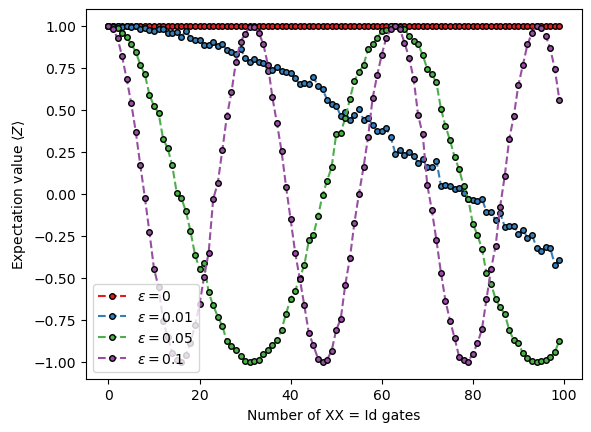

In [47]:
error_levels = [0, 0.01, 0.05, 0.1]
res = [run_noisy_exp(e) for e in error_levels]

colors = plt.cm.Set1((0,1,2,3))
for x, e, c in zip(res, error_levels, colors):
    plt.plot(x, label = fr'$\epsilon = {e}$', marker='o', ms = 4, mec = 'k', ls = '--', c=c)

plt.xlabel('Number of XX = Id gates')
plt.ylabel(r'Expectation value $\langle{Z}\rangle$')
plt.legend()

#### Incoherent noise model

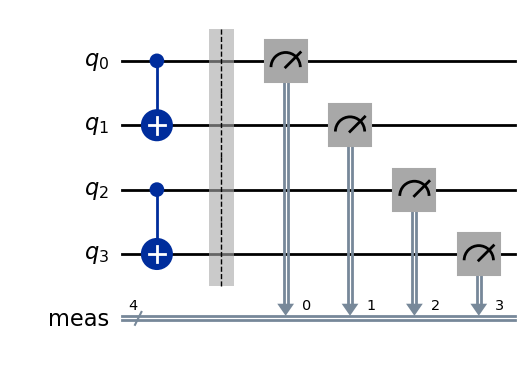

In [48]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

qc = qk.QuantumCircuit(4)
qc.cx(0,1)
qc.cx(2,3)
qc.measure_all()
qc.draw(output='mpl')

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  Qubits with noise: [0, 1, 2, 3]
  Specific qubit errors: [('cx', (0, 1)), ('cx', (2, 3))]


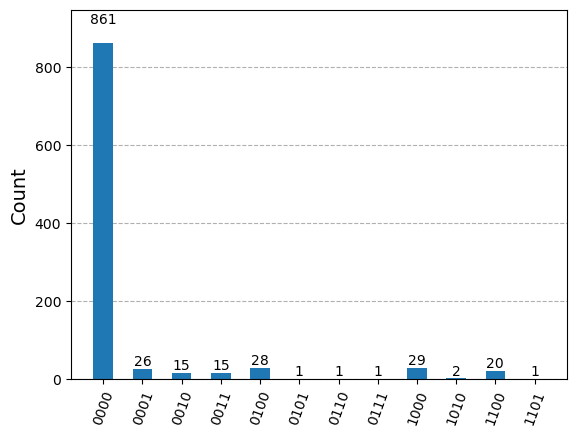

In [66]:
error = depolarizing_error(0.1, 2)

noise_model = NoiseModel()
noise_model.add_quantum_error(error, ['cx'], [0, 1])
noise_model.add_quantum_error(error, ['cx'], [2, 3])
noisy_bknd = AerSimulator(noise_model=noise_model)
print(noise_model)
        
qc_transpiled = qk.transpile(qc, noisy_bknd)
counts = noisy_bknd.run(qc_transpiled, shots = 1000).result().get_counts()
plot_histogram(counts)

In [67]:
# Can you guess what this function is doing
sum([freq * (-1) ** sum([int(x) for x in bitstring]) for bitstring, freq in counts.items()]) / sum(counts.values())

0.8

In [68]:
# Doing the same with Qiskit functions
from qiskit.quantum_info import DensityMatrix

qc_nomeas = qc.copy()
qc_nomeas.remove_final_measurements()
qc_nomeas.save_density_matrix()
qc_nomeas.draw()

rho = noisy_bknd.run(qc_nomeas).result().data()['density_matrix']
rho.expectation_value(Pauli('ZZZZ'))

0.8099999999999999

# 10. An example of VQAs with Pennylane

In [69]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device('default.qubit', wires=1)

Rx rotation with θ = 1.5707963267948966
|psi> =  [0.70710678+0.j         0.        -0.70710678j]


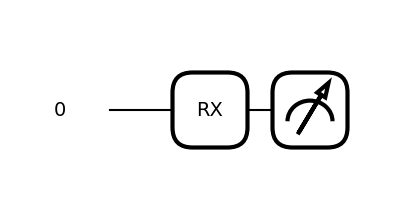

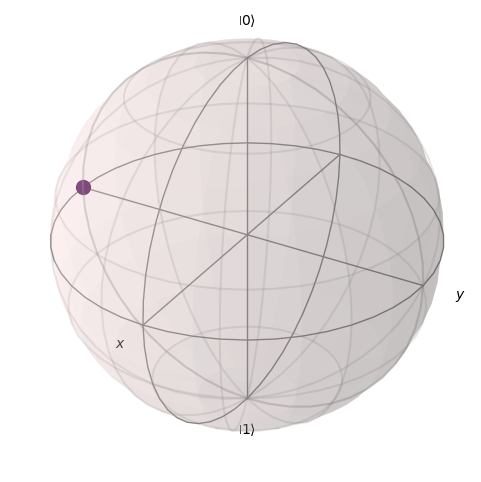

In [79]:
@qml.qnode(dev)
def circuitRX(theta):
    qml.RX(theta, wires=0)
    return qml.state()

# Choose a rotation angle
theta = np.pi/2

# Plot quantum circuit
qml.draw_mpl(circuitRX)(0.5)

# Action in the bloch sphere representation
state = circuitRX(theta)
plot_state(state)

print(f"Rx rotation with θ = {theta}")
print("|psi> = ", state)

#### Optimization: a complete example
Let's now build a complete example: automatically move the qubit from a starting excited state to the low energy state $|0\rangle$. The "energy" of quantum system is encoded in a matrix called _Hamiltonian_, denoted with $\mathcal{H}$. In our case, we consider an Hamiltonian $\mathcal{H}=-Z$, where $Z$ is the Pauli matrix:
$$
H = -Z = -\begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix}\,,\quad |0\rangle = \begin{bmatrix}1 \\ 0 \end{bmatrix}\,,\quad |1\rangle = \begin{bmatrix}0 \\ 1 \end{bmatrix}
$$
The energies of the single qubit _ground state_ $|0\rangle$ and the excited state $|1\rangle$ are then
$$
\text{Energy of state}\,\, |0\rangle = E_{0} = \langle 0 | H | 0 \rangle = -1
$$

$$
\text{Energy of state}\,\, |1\rangle = E_{1} = \langle 1 | H | 1 \rangle = 1
$$

We will now find a way to minimize the energy of a qubit automatically by gradient descent!  

First, define a general circuit that uses rotations `RX` and `RY` sequentially:

θ = [0.71263417 0.70734425]
Energy(θ) = -0.5751164052481159


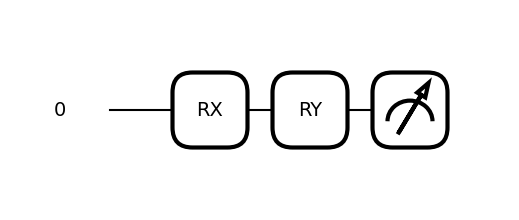

In [72]:
@qml.qnode(dev)
def energy_circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(-1.*qml.PauliZ(0)) # <--- This is like an energy term, something that we want to minimize

@qml.qnode(dev)
def state_circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.state()

qml.draw_mpl(energy_circuit)([0,0,0]);

# Let's first generate three random initial parameters
thetas = np.random.rand(2)
e = energy_circuit(thetas)

print(f"θ = {thetas}")
print(f"Energy(θ) = {e}")

With this circuit, the energy function that we are trying to minimize is 

$$
|\psi\rangle = R_x(\theta)R_y(\phi)|0\rangle \implies \text{Energy of}\, |\psi\rangle\, \text{is}:\quad E_{|\psi\rangle}(\theta,\phi) :\,=\langle \psi | H | \psi \rangle = -\cos(\theta)\cos(\phi)
$$

Define an _optimization method_, in this case we use plain Gradient Descent:

In [73]:
opt = qml.GradientDescentOptimizer(stepsize=0.2)

In [75]:
def training_circuit(cost_function, params, **kwargs):
    """
    Optimize a cost function given some initial parameters
    """

    # Store the values of the cost function
    energy = [cost_function(params, **kwargs)]

    # Store the parameters of the circuit (the rotation angles)
    angle = [params]

    # Set some stopping criterion for the optimization
    max_iterations = 100
    conv_tol = 1e-08

    # Optimization
    for n in range(max_iterations):
        # Perform a gradient descent step and obtain new parameters in the circuit
        params, prev_energy = opt.step_and_cost(cost_function, params, **kwargs)

        # Save new energy and new parameters 
        energy.append(cost_function(params, **kwargs))
        angle.append(params)

        # Check if reached convergence
        conv = np.abs(energy[-1] - prev_energy) 

        # Print intermediate values
        if n % 2 == 0:
            print(f"Step = {n},  Energy = {energy[-1]:.8f}")

        # Break if convergence tolerance is reached
        if conv <= conv_tol:
            print("Convergence reached.")
            break

    print(f"\nFinal value of the ground-state energy = {energy[-1]:.8f}")
    print(f"Optimal value of the circuit parameter = {np.round(angle[-1], 8)}")

    return energy, np.array(angle)

initial_parameters = np.array([.23, 2.4], requires_grad=True)
energy_history, params_history = training_circuit(energy_circuit, initial_parameters)

Step = 0,  Energy = 0.62023830
Step = 2,  Energy = 0.35700455
Step = 4,  Energy = 0.02584254
Step = 6,  Energy = -0.31528179
Step = 8,  Energy = -0.60326532
Step = 10,  Energy = -0.79956428
Step = 12,  Energy = -0.90852057
Step = 14,  Energy = -0.96061733
Step = 16,  Energy = -0.98351827
Step = 18,  Energy = -0.99318799
Step = 20,  Energy = -0.99719939
Step = 22,  Energy = -0.99885111
Step = 24,  Energy = -0.99952912
Step = 26,  Energy = -0.99980708
Step = 28,  Energy = -0.99992097
Step = 30,  Energy = -0.99996763
Step = 32,  Energy = -0.99998674
Step = 34,  Energy = -0.99999457
Step = 36,  Energy = -0.99999778
Step = 38,  Energy = -0.99999909
Step = 40,  Energy = -0.99999963
Step = 42,  Energy = -0.99999985
Step = 44,  Energy = -0.99999994
Step = 46,  Energy = -0.99999997
Convergence reached.

Final value of the ground-state energy = -0.99999998
Optimal value of the circuit parameter = [6.6960e-05 1.6836e-04]


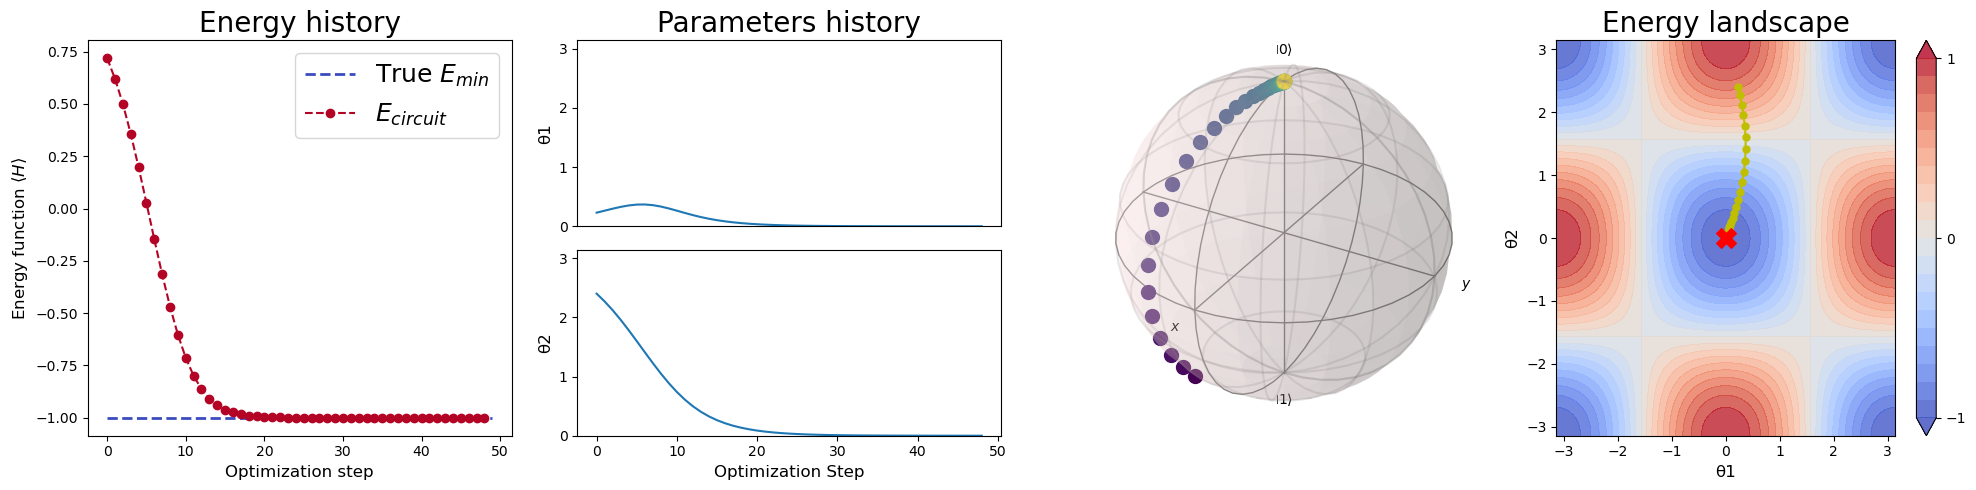

In [76]:
fig = plt.figure(figsize=(20, 5))

ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=1, rowspan=2)
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax3 = plt.subplot2grid((2, 4), (1, 1))
ax4 = plt.subplot2grid((2, 4), (0, 2), projection = '3d', rowspan=2)
ax5 = plt.subplot2grid((2, 4), (0, 3), rowspan=2)

ax1.set_title("Energy history", fontsize=20)
ax1.set_xlabel("Optimization step", fontsize=12)
ax1.set_ylabel(r"Energy function $\langle H \rangle$", fontsize=12)
ax1.hlines(-1, 0, len(energy_history), lw=2, ls='--', color=plt.cm.coolwarm(0), label="True $E_{min}$")
ax1.plot(energy_history, ls="--", marker='o', color=plt.cm.coolwarm_r(0), label="$E_{circuit}$")
ax1.legend(fontsize = 18)

ax2.set_title("Parameters history", fontsize=20)
ax2.set_xticks([])
ax2.set_ylabel("θ1", fontsize=12)
ax2.plot(params_history[:, 0])
ax2.set_ylim(0,np.pi)

ax3.set_xlabel("Optimization Step", fontsize=12)
ax3.set_ylabel("θ2", fontsize=12)
ax3.plot(params_history[:, 1])
ax3.set_ylim(0, np.pi)

states = np.array([state_circuit(p) for p in params_history])
plot_state(states, ax=ax4)

ax5.set_title("Energy landscape", fontsize = 20)
ax5.set_xlabel("θ1", fontsize=12)
ax5.set_ylabel("θ2", fontsize=12)
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
x, y = np.meshgrid(x, y)
z = -np.cos(x)*np.cos(y)
cnt = ax5.contourf(x, y, z, 100, levels=np.arange(-1, 1.1, 0.1), cmap=plt.cm.coolwarm, alpha=0.8, extend="both")
ax5.scatter(params_history[-1, 0], params_history[-1, 1], color='r', marker='X', s=200, zorder=2)
ax5.plot(params_history[:, 0], params_history[:, 1], ls='--', marker='.', c='y', markersize=10, zorder=1)
plt.colorbar(cnt, ticks=[-1, 0, 1])

plt.tight_layout()
plt.show()

#### _...the end._